# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals

2024 developped by Nicolas Flipo from demo_gen_test.ipynb created by Guillaume de Rochefort during MOLONARI 2022 

The object of this demo is to present a class responsible for generating a simulation of pressure and temperature sensor data in cases where data from the CAPTEUR project is not available. Based on the `synthetic_MOLONARI` class in `synthetic_MOLONARI.py`.

We will show the `synthetic_MOLONARI` object which allows generating purely periodic datasets with the possibility of Gaussian noise. We will illustrate the interaction of `synthetic_MOLONARI` with the `Column` class and the `layer` class.

The other demo file `demo_val_direct.ipynb` highlights a more global use of the classes from `synthetic_MOLONARI.py` and `val_analy.py`.


In [1]:
# démo time_series
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

In [2]:
# l'utilisateur saisit ses paramètres d'émulation de mesure
"""Fenêtre temporelle"""
# le format demandé est celui-ci : (y,m,d,h,mn,s) compatible avec la librairie datetime
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 1
T_riv_offset = 12  + zeroT
nday = 3
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period
# Température de l'aquifère
T_aq_amp = 0
T_aq_offset = 12 + zeroT
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle
dH_amp = 0
dH_offset = 0.5 #1meter ?
P_dh = -9999 #14*24*4*dt


depth_sensors = [.1, .2, .3, .4]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors T1, T2, T3, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series dH = Hriv-Haq

#### Creating a multi-periodic signal

To do this, we have changed the signal generating function and now the `param_T_riv_signal` is a list of lists. Following this structure : 

```python
"param_T_riv_signal": [[T_riv_amp0, P_T_riv0, T_riv_offset0], ..., [T_riv_ampN, P_T_rivN, T_riv_offsetN]]
```

In [3]:
liste_params_river = [[T_riv_amp, P_T_riv, T_riv_offset], [2*T_riv_amp, P_T_riv/2, 0]]

param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.5]
param_T_riv_signal: [[1, 259200, 285.15], [2, 129600.0, 0]]
param_T_aq_signal: [0, -9999, 285.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.5, dt 900.0 --> 
constant signal

Multiple periodic signals detected, summing them up.


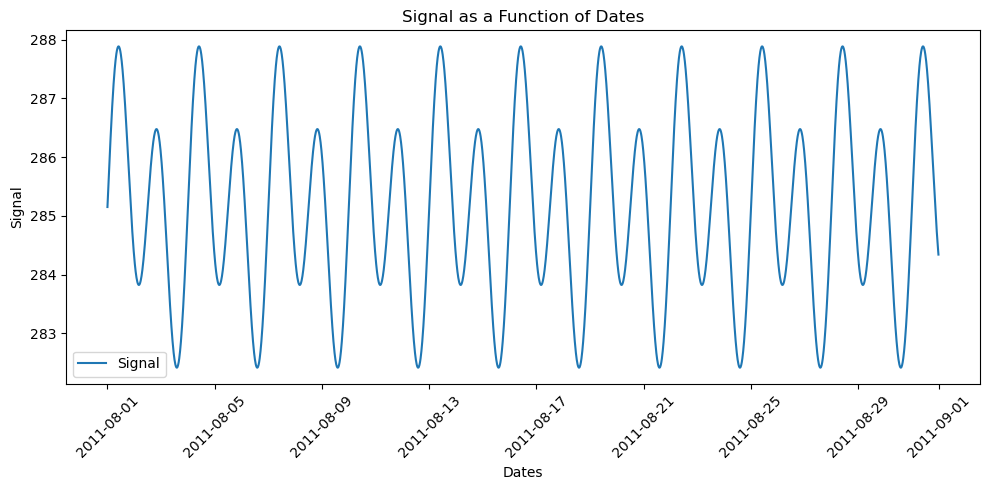

Single periodic signal detected, using create_periodic_signal function.
Entering T_aq generation with amplitude 0, period of -9999, offset 285.15, dt 900.0 --> 
constant signal

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [285.14999542 285.23179779 285.31346283 ... 284.63263092 284.58653412
 284.54245148]
Temperature of Sensor 1 : [285.14999695 285.20453186 285.25897522 ... 284.80508728 284.77435608
 284.74496765]
Temperature of Sensor 2 : [285.14999847 285.17726593 285.20448761 ... 284.97754364 284.96217804
 284.94748383]
Temperature of Sensor 3 : [285.15 285.15 285.15 ... 285.15 285.15 285.15]


In [7]:
"""Instanciation de l'objet Time_series"""
# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal":liste_params_river, #list of list for multiperiodic signal
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_test_user1 = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


# print(f"dH : {emu_observ_test_user1._molonariP_data}")
# print(f"Tshaft : {emu_observ_test_user1._T_Shaft_measures}")


### Quick spectral analysis of the signal.

Text(0, 0.5, 'River Temperature (K)')

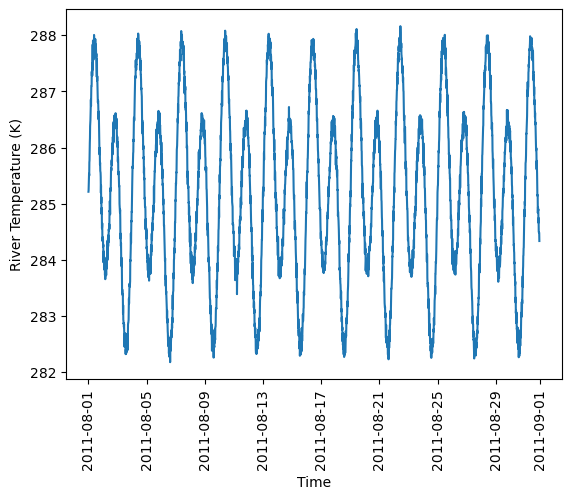

In [8]:
plt.plot(emu_observ_test_user1._dates, emu_observ_test_user1._T_riv)
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('River Temperature (K)')

Dominant period ≈ 1.4762 days (freq = 7.841e-06 Hz)


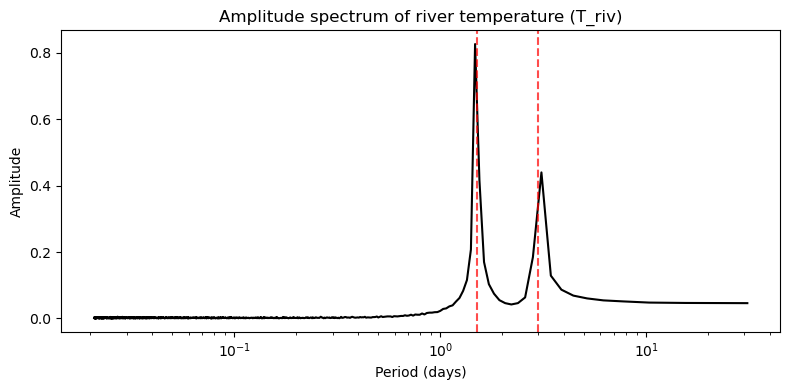

In [9]:
# Simple spectrum of the river temperature signal (T_riv)
y = np.asarray(emu_observ_test_user1._T_riv)
n = y.size
y = y - np.mean(y)   # remove DC

yf = np.fft.rfft(y)
amp = np.abs(yf) / n
freqs = np.fft.rfftfreq(n, d=dt)  # cycles per second

mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY  # convert period to days

plt.figure(figsize=(8, 4))
plt.plot(period_days, amp[mask], '-k')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum of river temperature (T_riv)')

# mark the input forcing periods (if defined in liste_params_river)
try:
    input_periods = [p[1] for p in liste_params_river if p[1] > 0]
    for p in input_periods:
        plt.axvline(p / NSECINDAY, color='r', linestyle='--', alpha=0.7)
except Exception:
    pass

# report dominant period
if amp[mask].size:
    idx = np.argmax(amp[mask])
    dom_period_days = period_days[idx]
    print(f"Dominant period ≈ {dom_period_days:.4f} days (freq = {freqs[mask][idx]:.3e} Hz)")

plt.tight_layout()
plt.show()

Maintenant on génère la couche

In [11]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":11,
    "n": 0.1,
    "lambda_s": 1,
    "rhos_cs": 4e6,
    "q": 0,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 0.4, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=False)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(moinslog10IntrinK=11, n=0.1, lambda_s=1, rhos_cs=4000000.0, q=0)


## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

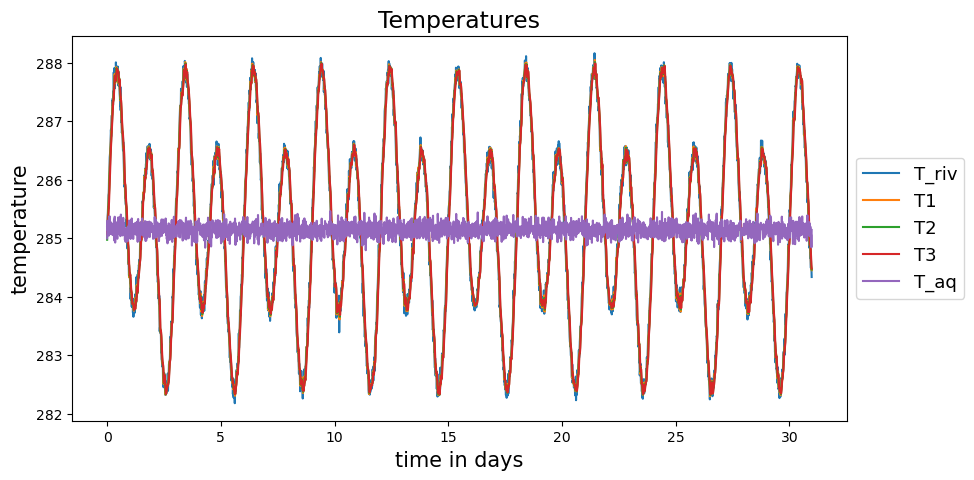

In [12]:
# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user1._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
col.plot_temperature_at_sensors(verbose=False)

The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

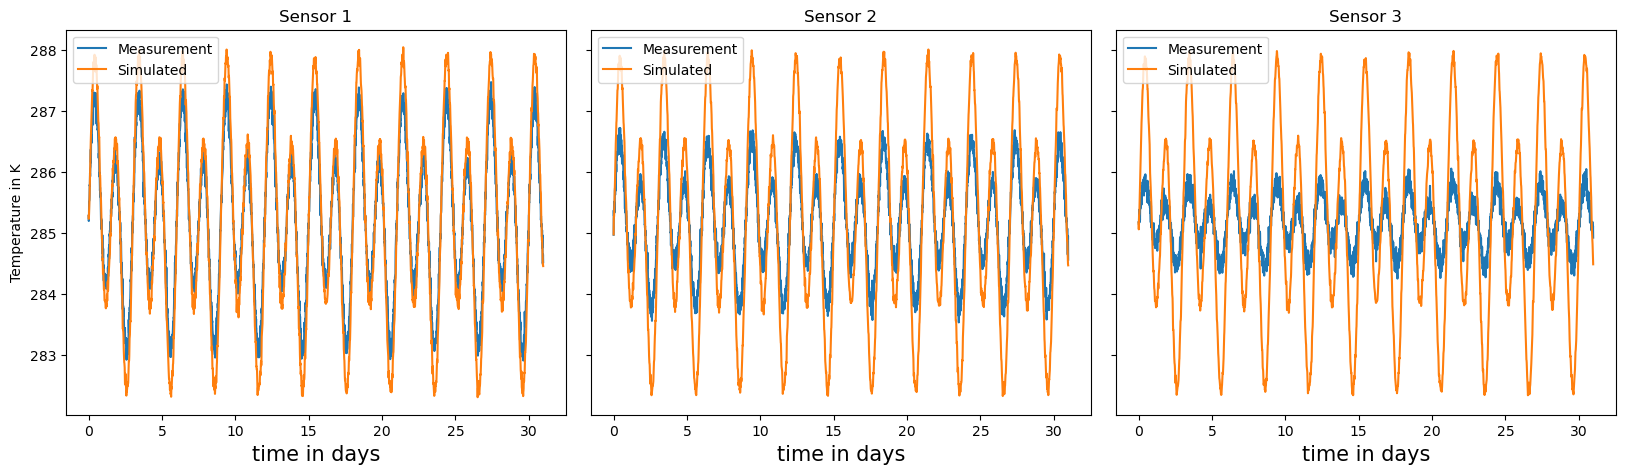

In [13]:

col.plot_compare_temperatures_sensors()

### On récupère les profils issus des capteurs.

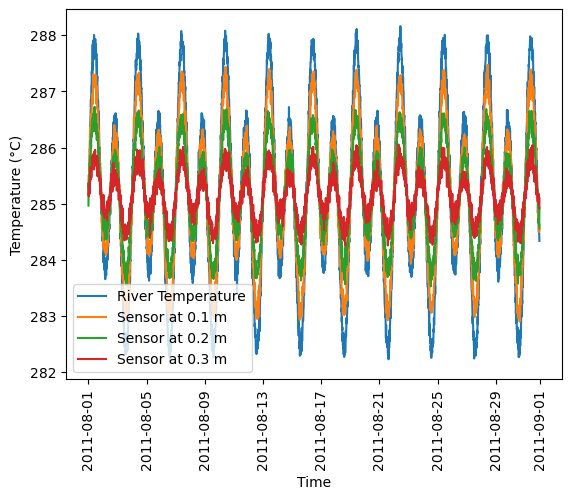

In [16]:
plt.plot(emu_observ_test_user1._dates, emu_observ_test_user1._T_riv, label="River Temperature")

for i in range(3):
    plt.plot(emu_observ_test_user1._dates, col._T_measures[:, i], label=f"Sensor at {depth_sensors[i]} m")
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

### Spectral analysis of the signals extracted from the sensors.

In [17]:
# build temperatures_capteurs: first row = river temperature, next rows = sensors (from col._T_measures)
river = np.asarray(emu_observ_test_user1._T_riv)
sensors = np.asarray(col._T_measures)  # expected shape (n_time, n_sensors)

# ensure sensors are (n_sensors, n_time)
sensors_T = sensors.T if sensors.ndim == 2 else np.atleast_2d(sensors).T

temperatures_capteurs = np.vstack([river, sensors_T]).astype(float)

print("temperatures_capteurs shape:", temperatures_capteurs.shape)

temperatures_capteurs shape: (4, 2976)


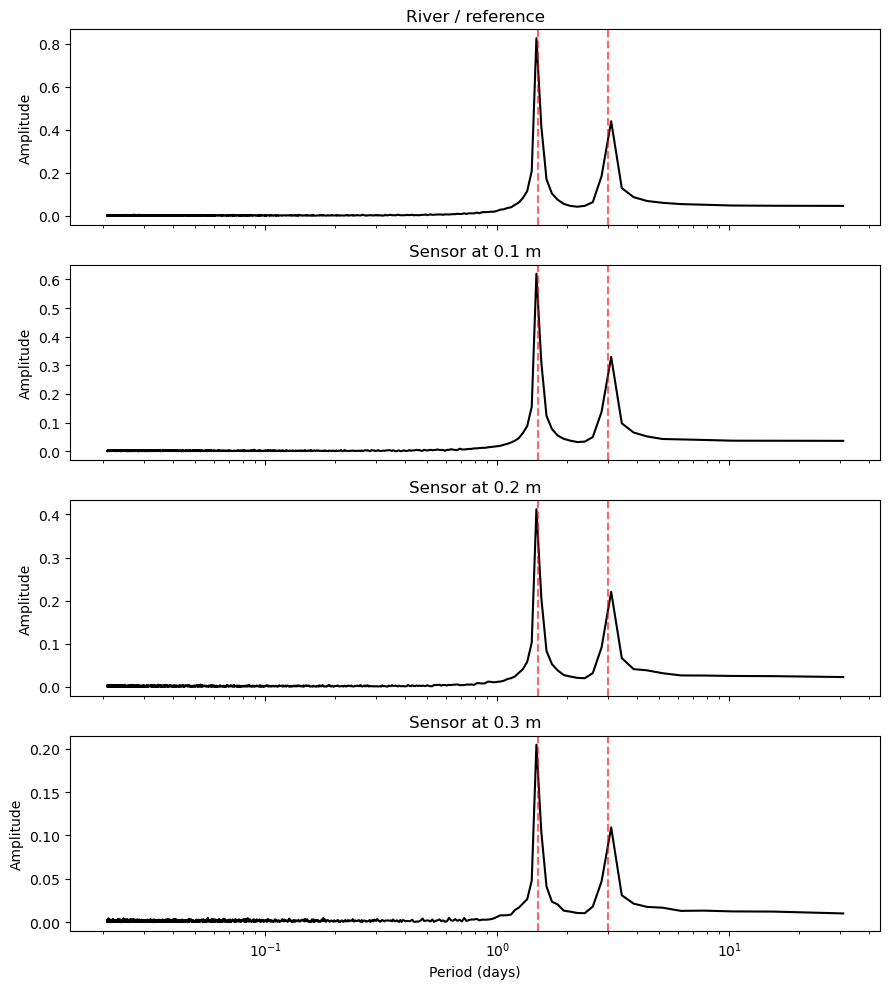

In [18]:
# FFT for each sensor signal (uses existing variables: temperatures_capteurs, dt, NSECINDAY, liste_params_river, depth_sensors)
signals = np.asarray(temperatures_capteurs)  # shape: (n_signals, n_time)
n_signals, n_time = signals.shape

fig, axes = plt.subplots(n_signals, 1, figsize=(9, 2.5 * n_signals), sharex=True)
if n_signals == 1:
    axes = [axes]

freqs = np.fft.rfftfreq(n_time, d=dt)  # cycles per second
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

# input forcing periods (in days) if available
input_periods_days = []
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
except Exception:
    pass

for i in range(n_signals):
    y = signals[i].astype(float)
    y = y - np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time

    ax = axes[i]
    ax.plot(period_days, amp[mask], '-k')
    ax.set_xscale('log')
    ax.set_ylabel('Amplitude')
    # label first row as "River" and the rest with sensor depths if available
    if i == 0:
        label = "River / reference"
    else:
        depth_label = depth_sensors[i-1] if (i-1) < len(depth_sensors) else f"idx {i}"
        label = f"Sensor at {depth_label} m"
    ax.set_title(label)

    for pday in input_periods_days:
        ax.axvline(pday, color='r', linestyle='--', alpha=0.6)

axes[-1].set_xlabel('Period (days)')
plt.tight_layout()
plt.show()

Now plot everything in the same plot

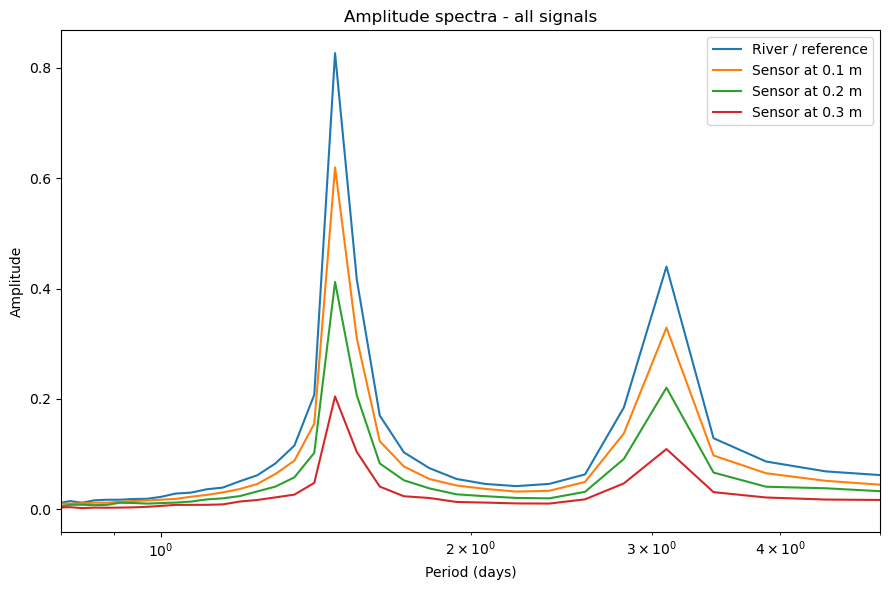

In [19]:
freqs = np.fft.rfftfreq(n_time, d=dt)
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

plt.figure(figsize=(9, 6))
cmap = plt.get_cmap("tab10")
for i in range(signals.shape[0]):
    y = signals[i].astype(float)
    y = y - np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    plt.plot(period_days, amp[mask], color=cmap(i), label=label)

plt.xlim(0.8, 5)
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra - all signals')
plt.legend()
plt.tight_layout()
plt.show()

##### Retrieving $a$.

Now we identify the dominant peaks for each signal, compute their amplitudes and the dephasing compared to the river reference.

Identified peaks (period days) and exponential-fit results (ratio ~ exp(-a*z)):

Peak at period ≈ 3.1000 days (freq idx 9)
  River amp = 0.4401
   sensor z=0.100 m: amp=0.3293, ratio=0.7483
   sensor z=0.200 m: amp=0.2205, ratio=0.501
   sensor z=0.300 m: amp=0.1092, ratio=0.2483
  Fit: a = 5.516961  (n=3 pts),  r2 = 0.976

Peak at period ≈ 1.4762 days (freq idx 20)
  River amp = 0.8269
   sensor z=0.100 m: amp=0.6198, ratio=0.7495
   sensor z=0.200 m: amp=0.4122, ratio=0.4985
   sensor z=0.300 m: amp=0.2046, ratio=0.2474
  Fit: a = 5.541265  (n=3 pts),  r2 = 0.977



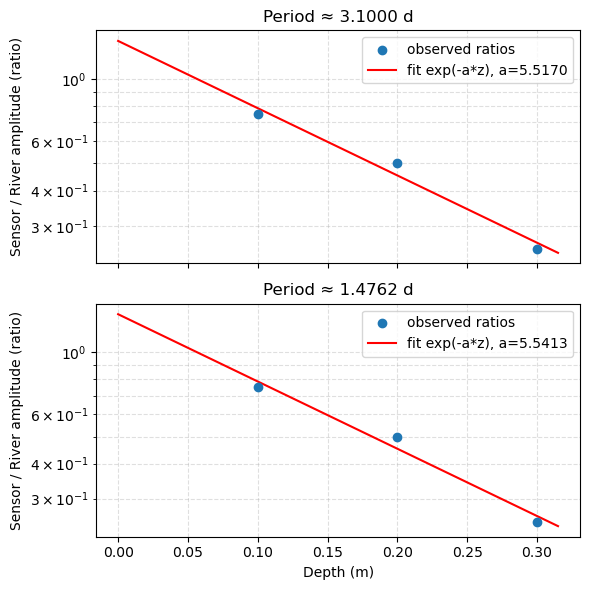

In [20]:
import math

# Identify high peaks in the amplitude spectra, compute amplitude ratios vs river,
# and fit an exponential decay ratio(z) ~ exp(-a * z).
# Uses existing variables in the notebook: signals, n_time, dt, depth_sensors, NSECINDAY, matplotlib, np

# prepare frequency / period axis
freqs = np.fft.rfftfreq(n_time, d=dt)     # cycles per second
mask = freqs > 0
freqs_pos = freqs[mask]
period_days = 1.0 / freqs_pos / NSECINDAY

# compute amplitude spectra for each signal
amps = []
for i in range(signals.shape[0]):
    y = signals[i].astype(float)
    y = y - np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    amps.append(amp[mask])
amps = np.vstack(amps)   # shape (n_signals, n_freq_pos)

# simple local-peak finder (neighbourhood maxima) on river spectrum
river_amp = amps[0]
# require local maxima and above a fraction of the river max to be considered "high"
threshold_frac = 0.20
thr = threshold_frac * np.nanmax(river_amp)

local_max_mask = np.r_[False, (river_amp[1:-1] > river_amp[:-2]) & (river_amp[1:-1] > river_amp[2:]), False]
peak_indices = np.where(local_max_mask & (river_amp > thr))[0]

# if none found by that rule, fallback to top-N peaks
if peak_indices.size == 0:
    Ntop = 6
    peak_indices = np.argsort(river_amp)[-Ntop:]

# prepare depths for sensors (signals[1:] are sensors)
depths = np.array(depth_sensors[: signals.shape[0] - 1], dtype=float)

results_peaks = []

for idx_local in peak_indices:
    pday = period_days[idx_local]
    river_a = river_amp[idx_local]
    # collect sensor amplitudes and ratios
    sensor_amps = amps[1:, idx_local]
    # avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        ratios = sensor_amps / river_a
    # keep only positive ratios for fitting
    valid = np.isfinite(ratios) & (ratios > 0)
    fit_res = None
    if valid.sum() >= 2:
        z = depths[valid]
        r = ratios[valid]
        # linear fit on log(r) = -a*z + b
        logr = np.log(r)
        slope, intercept = np.polyfit(z, logr, 1)
        a_fit = -slope
        # compute R^2
        pred_logr = slope * z + intercept
        ss_res = np.sum((logr - pred_logr) ** 2)
        ss_tot = np.sum((logr - np.mean(logr)) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan
        fit_res = {"a": float(a_fit), "b": float(intercept), "r2": float(r2), "n_points": int(valid.sum())}
    results_peaks.append({
        "freq_idx": int(idx_local),
        "period_days": float(pday),
        "river_amp": float(river_a),
        "sensor_amps": sensor_amps.tolist(),
        "ratios": ratios.tolist(),
        "fit": fit_res
    })

# Print concise summary
print("Identified peaks (period days) and exponential-fit results (ratio ~ exp(-a*z)):\n")
for r in results_peaks:
    print(f"Peak at period ≈ {r['period_days']:.4f} days (freq idx {r['freq_idx']})")
    print(f"  River amp = {r['river_amp']:.4g}")
    for k, (z, sa, rr) in enumerate(zip(depths, r['sensor_amps'], r['ratios'])):
        print(f"   sensor z={z:.3f} m: amp={sa:.4g}, ratio={rr:.4g}")
    if r['fit'] is not None:
        print(f"  Fit: a = {r['fit']['a']:.6f}  (n={r['fit']['n_points']} pts),  r2 = {r['fit']['r2']:.3f}")
    else:
        print("  Fit: insufficient positive ratio points for reliable fit")
    print("")

# Plot ratios vs depth and fitted curves for each peak
fig, axes = plt.subplots(len(results_peaks), 1, figsize=(6, 3 * len(results_peaks)), sharex=True)
if len(results_peaks) == 1:
    axes = [axes]

for ax, r in zip(axes, results_peaks):
    ratios = np.array(r['ratios'])
    ax.scatter(depths, ratios, label='observed ratios', zorder=5)
    valid = np.isfinite(ratios) & (ratios > 0)
    if r['fit'] is not None and valid.sum() >= 2:
        a = r['fit']['a']
        b = r['fit']['b']
        zz = np.linspace(0.0, depths.max()*1.05, 100)
        fit_curve = np.exp(-a * zz + b)  # exp(b) * exp(-a z)
        ax.plot(zz, fit_curve, 'r-', label=f'fit exp(-a*z), a={a:.4f}')
    ax.set_yscale('log')
    ax.set_ylabel('Sensor / River amplitude (ratio)')
    ax.set_title(f"Period ≈ {r['period_days']:.4f} d")
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()

axes[-1].set_xlabel('Depth (m)')
plt.tight_layout()
plt.show()

Here are temperature profiles simulated by pyheatmy

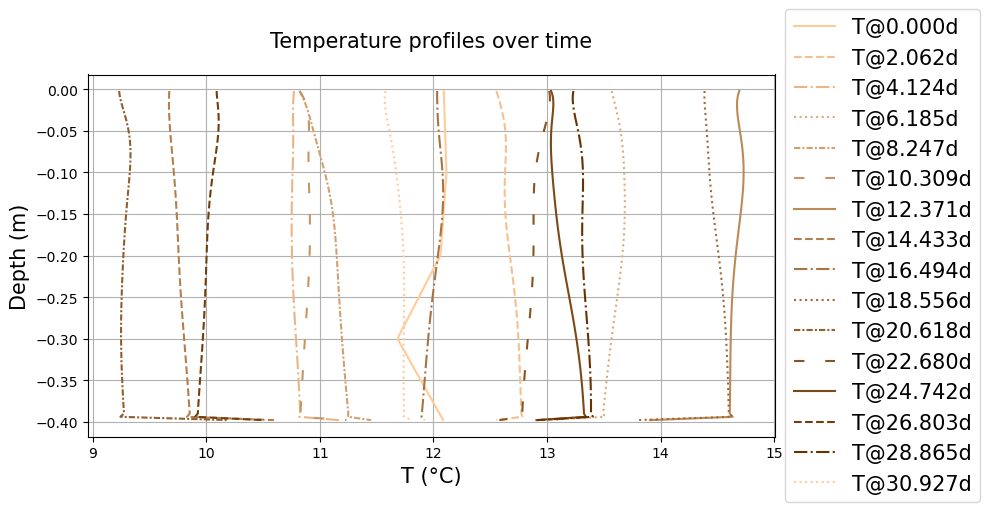

In [32]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

[(datetime.datetime(2011, 8, 1, 0, 0), array([285.24318475, 285.11212303, 284.97305374, 285.25707406])), (datetime.datetime(2011, 8, 1, 0, 15), array([285.26089219, 285.32475177, 285.3417793 , 285.27409566])), (datetime.datetime(2011, 8, 1, 0, 30), array([285.11982193, 285.38129211, 285.19257197, 285.45606742])), (datetime.datetime(2011, 8, 1, 0, 45), array([285.15304085, 285.18340406, 285.34833188, 285.00636903])), (datetime.datetime(2011, 8, 1, 1, 0), array([285.56794482, 285.51187699, 285.3265393 , 285.09357052])), (datetime.datetime(2011, 8, 1, 1, 15), array([285.4521253 , 285.38272253, 285.45318435, 284.97252526])), (datetime.datetime(2011, 8, 1, 1, 30), array([285.53083891, 285.65612282, 285.63873131, 285.42558071])), (datetime.datetime(2011, 8, 1, 1, 45), array([285.82232731, 285.79435242, 285.52826559, 285.19533696])), (datetime.datetime(2011, 8, 1, 2, 0), array([285.90284272, 285.89200651, 285.50374024, 285.30901543])), (datetime.datetime(2011, 8, 1, 2, 15), array([285.9187529

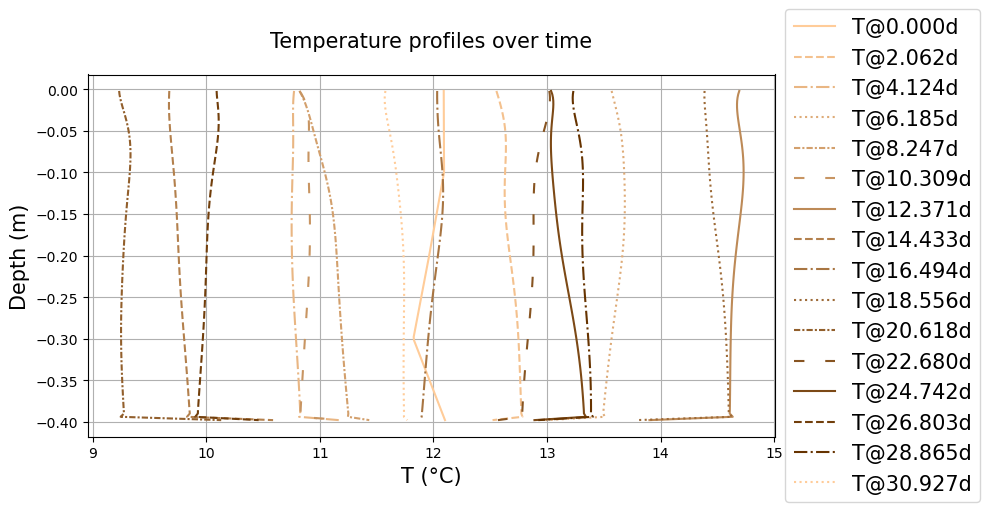

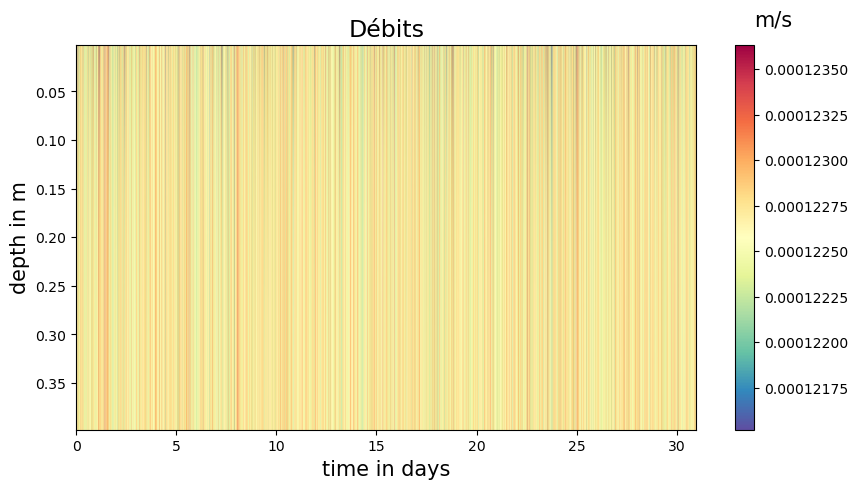

RMSE at sensor 0 : 0.09922172158871846
RMSE at sensor 1 : 0.09936713886943421
RMSE at sensor 2 : 0.09750940087486185
Total RMSE : 0.09870302525100415
Plotting Température in column. time series have nrecords =  2976
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv closed successfully.
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualLabo/pressure_sensors/Pvirtual.csv
Printing Sensor file 1
File /Users/noedaniel

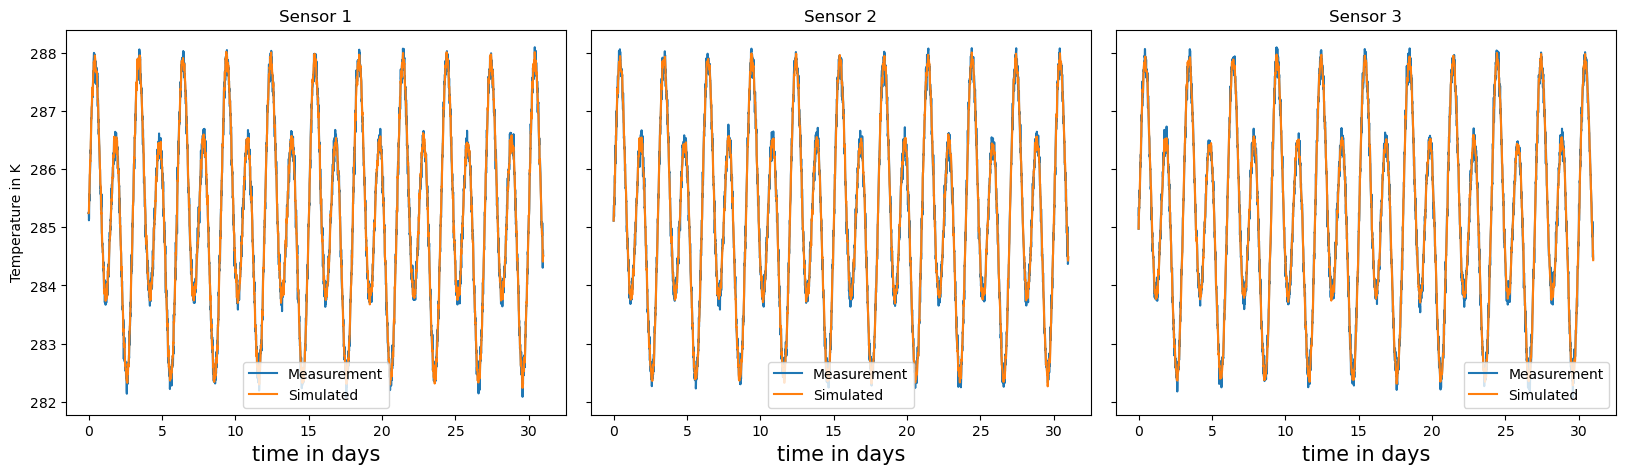

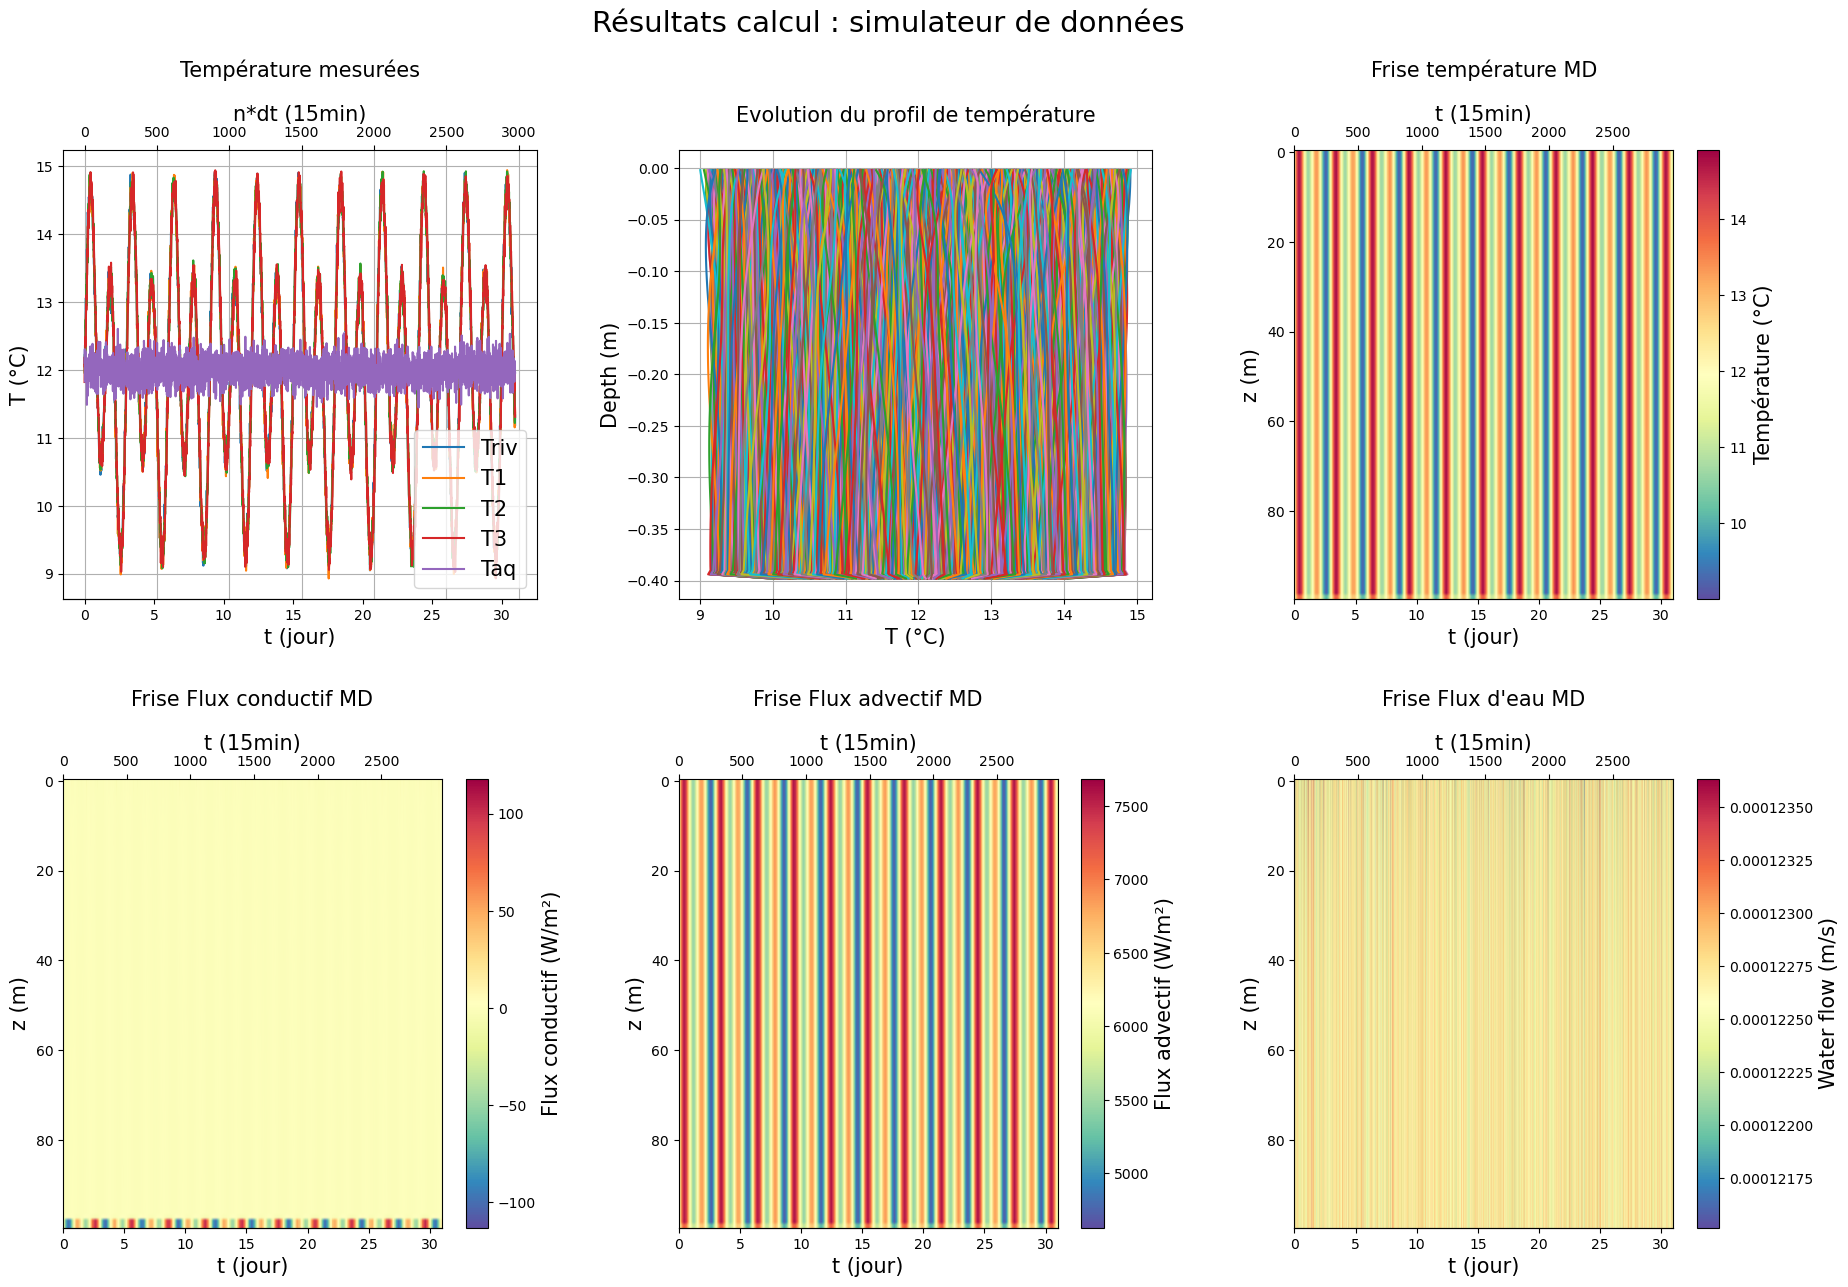

In [33]:
print(emu_observ_test_user1._molonariT_data)

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.set_layers(Layer1)
newCol.compute_solve_transi(verbose=True)

nt = len(newCol._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = newCol.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

# Multilayered riverbed -- No printing option activated

## Warning
It seems that there is a bug at the interface between layers and also if a sensor is located at the interface

In [ ]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 20 + ZERO_CELSIUS
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14 + ZERO_CELSIUS
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = 0.1
P_dh = -9999 #14*24*4*dt

Zbottom = 0.6
depth_sensors = [.1, .25, .3, .4, Zbottom] # le code fonctionne avec n capteurs, watch the compatibility with Zbottom

In [ ]:
time_series_dict_user4 = {
    "offset" : 0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

In [ ]:
emu_observ_test_user4 = synthetic_MOLONARI.from_dict(time_series_dict_user4)
# emu_observ_test_user4._generate_all_series()



In [ ]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Layer1 = {
    "name": "gravier",
    "zLow": .2,
    "moinslog10IntrinK":11,
    "n": .4,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

Layer2 = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":14,
    "n": .1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

# on utilise les mesures générées précédemment
col_dict4 = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": emu_observ_test_user4._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user4._sigma_T, #float
}

col4 = Column.from_dict(col_dict4)

# modèle une couche
col4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])

# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user4._measures_column_one_layer(col4)
#emu_observ_test_user1._plot_molonariT_data()
col4.plot_temperature_at_sensors(verbose=False)


# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol4_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
ncol4 = Column.from_dict(newCol4_dict)
ncol4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])
ncol4.compute_solve_transi(verbose=True)

nt = len(ncol4._temperatures[0,:])
dplot=15
ncol4.plot_temperatures_umbrella(round(nt/dplot))

flows = ncol4.get_flows_solve()
unitLeg="m/s"
title="Débits"
ncol4.plot_it_Zt(flows,title,unitLeg,1.04,2)

ncol4.print_RMSE_at_sensor()
ncol4.plot_compare_temperatures_sensors()
ncol4.plot_CALC_results()
#ncol4.print_in_file_processed_MOLONARI_dataset(zeroT=0) #No printing of the multilayer case study for the usage of demoInversion.ipynb


